<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/06.DropOut_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.random.set_seed(1)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Get MNIST Data

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# MLP Model for classifiation

In [24]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(256, activation='sigmoid'), # dense layer 1
    Dropout(0.2), # DropOut 20% on dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dropout(0.1), # DropOut 10% on dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [26]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)] # Early Stopping
hist=model.fit(x_train, y_train, epochs=100, 
          batch_size=2000, validation_split = 0.2, callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 23us/sample - loss: 2.1286 - accuracy: 0.2860 - val_loss: 1.7597 - val_accuracy: 0.6217
Epoch 2/100
48000/48000 [==============================] - 1s 11us/sample - loss: 1.4714 - accuracy: 0.6413 - val_loss: 1.0760 - val_accuracy: 0.7922
Epoch 3/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.9467 - accuracy: 0.7662 - val_loss: 0.7011 - val_accuracy: 0.8523
Epoch 4/100
48000/48000 [==============================] - 1s 10us/sample - loss: 0.6808 - accuracy: 0.8279 - val_loss: 0.5238 - val_accuracy: 0.8785
Epoch 5/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.5416 - accuracy: 0.8574 - val_loss: 0.4270 - val_accuracy: 0.8944
Epoch 6/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4616 - accuracy: 0.8765 - val_loss: 0.3693 - val_accuracy: 0.9051
Epoch 7/100
48000/48000 [=========================

Epoch 55/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 56/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.0845 - accuracy: 0.9746 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 57/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.0962 - val_accuracy: 0.9714
Epoch 58/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 59/100
48000/48000 [==============================] - 1s 11us/sample - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0942 - val_accuracy: 0.9721
Epoch 60/100
48000/48000 [==============================] - 1s 12us/sample - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0923 - val_accuracy: 0.9722
Epoch 61/100
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0754 - ac

# Test

In [27]:
results = model.evaluate(x_test,  y_test, verbose = 0)

In [28]:
print('test loss, test acc:', results)

test loss, test acc: [0.07277600814383477, 0.9783]


In [29]:
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import normalize

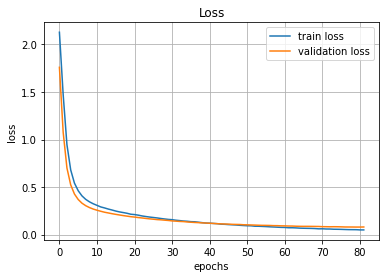

In [30]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

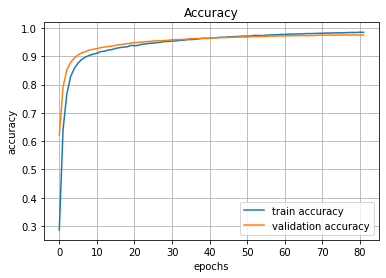

In [31]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()